In [72]:
import pandas as pd 

data = pd.read_csv("Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv")

print(data.head())

data = data.drop(columns = ['Data As Of', 'Group', 'ICD10_codes', 'Flag'])

print(data.info())
# importing and deleting non useful columns 

mine = (data[(data['Number of Mentions'] < 30) & (data['COVID-19 Deaths'] > 1)].count())
print(mine) #Seing 

   Data As Of  Start Date    End Date     Group  Year  Month          State  \
0  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
1  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
2  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
3  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
4  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18     25-34   
2  Respiratory diseases  Influenza and pneumonia     J09-J18     35-44   
3  Respiratory diseases  Influenza and pneumonia     J09-J18     45-54   
4  Respiratory diseases  Influenza and pneumonia     J09-J18     55-64   

   COVID-19 Deaths  Number of Mentions Flag  
0           1569.0              16

In [73]:
data = data.dropna(subset=["COVID-19 Deaths"])
mine = (data[(data['Number of Mentions'] < 30) & (data['COVID-19 Deaths'] > 1)].count())
print(mine)
print(data[data['COVID-19 Deaths'] > 1].count())
print(data.count())
print(data.duplicated().sum())
print(data.isnull().sum())

print(data.describe())

data = data.dropna(subset=["Year"])
print (data.count())  # checking sums and count and deleting the duplicates and the null values for the year
print(data.duplicated().sum())

Start Date            60938
End Date              60938
Year                  59775
Month                 53660
State                 60938
Condition Group       60938
Condition             60938
Age Group             60938
COVID-19 Deaths       60938
Number of Mentions    60938
dtype: int64
Start Date            148353
End Date              148353
Year                  139488
Month                 113024
State                 148353
Condition Group       148353
Condition             148353
Age Group             148353
COVID-19 Deaths       148353
Number of Mentions    148353
dtype: int64
Start Date            437551
End Date              437551
Year                  426839
Month                 388500
State                 437551
Condition Group       437551
Condition             437551
Age Group             437551
COVID-19 Deaths       437551
Number of Mentions    437551
dtype: int64
0
Start Date                0
End Date                  0
Year                  10712
Month          

Missing values in COVID-19 Deaths column: 0
Data distribution:
count    426839.000000
mean         81.635516
std        1574.081992
min           0.000000
25%           0.000000
50%           0.000000
75%          16.000000
max      463274.000000
Name: COVID-19 Deaths, dtype: float64


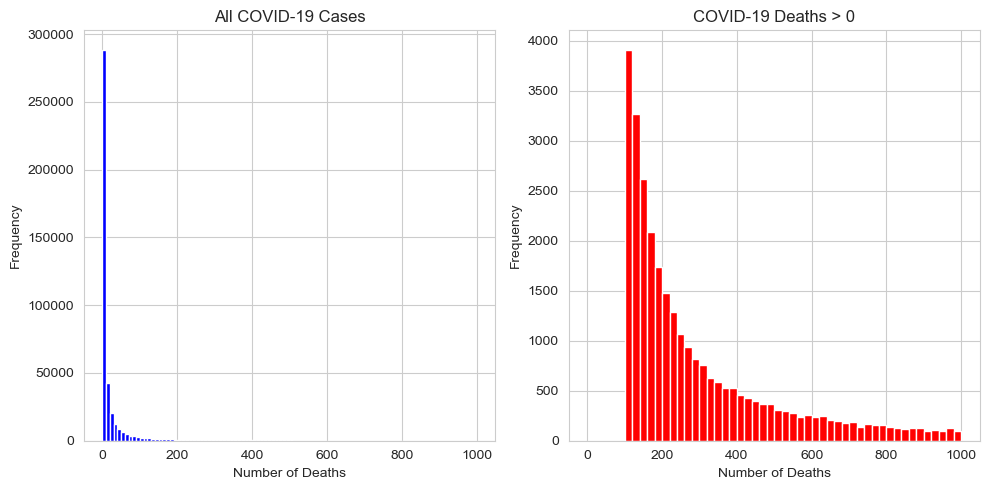

In [74]:
import matplotlib.pyplot as plt

# Check for missing values in 'COVID-19 Deaths' column
print("Missing values in COVID-19 Deaths column:", data['COVID-19 Deaths'].isnull().sum())

# Check data distribution
print("Data distribution:")
print(data['COVID-19 Deaths'].describe())


fig = plt.figure(figsize=(10, 5))

# Create the first subplot for all deaths
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(data['COVID-19 Deaths'], bins=100, color='blue', range=(0, 1000))
ax1.set_title('All COVID-19 Cases')
ax1.set_xlabel('Number of Deaths')
ax1.set_ylabel('Frequency')

# Create the second subplot for deaths > 0
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(data[data['COVID-19 Deaths'] > 100]['COVID-19 Deaths'], bins=50, color='red', range=(0, 1000))
ax2.set_title('COVID-19 Deaths > 0')
ax2.set_xlabel('Number of Deaths')
ax2.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [75]:
print(data["Age Group"].nunique())
unique_age_groups = data["Age Group"].unique()
print(unique_age_groups)
# Define the mapping from age groups to integers
age_group_mapping = {
    '0-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65-74': 6,
    '75-84': 7,
    '85+': 8,
    'Not stated': 9
}

# Map the age groups to integers using the defined mapping
data['Age Group Integer'] = data['Age Group'].map(age_group_mapping)

# Print the first few rows to verify the mapping
print(data[['Age Group', 'Age Group Integer']].head(20))



10
['0-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75-84' '85+' 'Not stated'
 'All Ages']
      Age Group  Age Group Integer
12420      0-24                1.0
12421      0-24                1.0
12422      0-24                1.0
12423      0-24                1.0
12424     25-34                2.0
12425     25-34                2.0
12426     25-34                2.0
12427     25-34                2.0
12428     35-44                3.0
12429     35-44                3.0
12430     35-44                3.0
12431     35-44                3.0
12432     45-54                4.0
12433     45-54                4.0
12434     45-54                4.0
12435     45-54                4.0
12436     55-64                5.0
12437     55-64                5.0
12438     55-64                5.0
12439     55-64                5.0


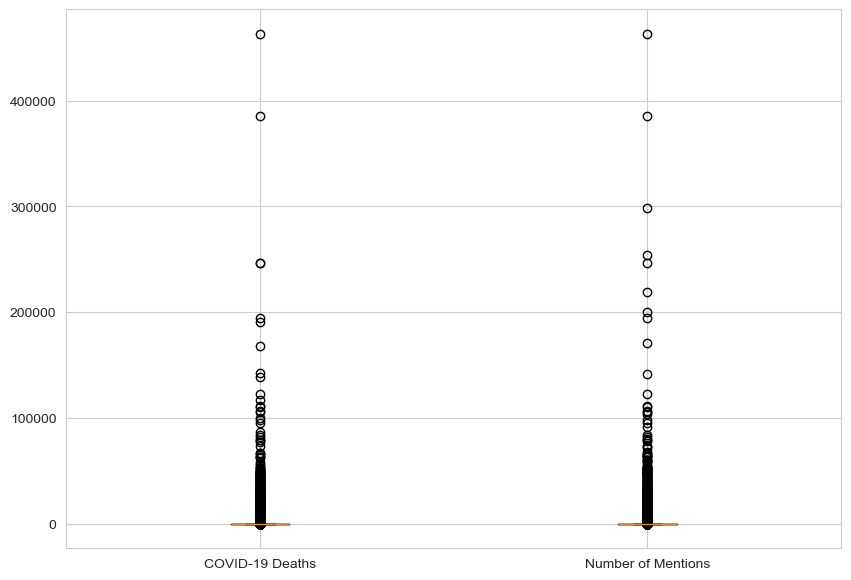

In [76]:
fig = plt.figure(figsize =(10, 7))

# Select columns for box plot
columns_for_boxplot = ['COVID-19 Deaths', 'Number of Mentions']

# Plot box plot for selected columns
plt.boxplot(data[columns_for_boxplot].values, labels=columns_for_boxplot)

plt.show()

In [79]:
covid_deaths_gt_zero = (data[data["COVID-19 Deaths"] > 500].count())
mentions_gt_zero = (data[data["Number of Mentions"] > 500].count())
ew1 = (data[data["Number of Mentions"] < 25].count())
print(data["Number of Mentions"].max())

print ("ew1 = " , ew1)
# print(covid_deaths_gt_zero)
# print(mentions_gt_zero)
mine = (data[(data['Number of Mentions'] < 30) & (data['COVID-19 Deaths'] > 1)].count())
print(mine)  # 59k

data_filteredMentions30 = data[(data["COVID-19 Deaths"] > 1 ) & (data["Number of Mentions"] < 30)]

hey = data["Number of Mentions"].max()
print(hey)

print (data_filteredMentions30.count())
print (data_filteredMentions30.describe())
print (data_filteredMentions30.info())
mine = (data_filteredMentions30[(data_filteredMentions30['Number of Mentions'] < 30) & (data_filteredMentions30['COVID-19 Deaths'] > 1)].count())
print(mine)  # 59k

463274.0
ew1 =  Start Date            338133
End Date              338133
Year                  338133
Month                 321307
State                 338133
Condition Group       338133
Condition             338133
Age Group             338133
COVID-19 Deaths       338133
Number of Mentions    338133
Age Group Integer     322679
dtype: int64
Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64
463274.0
Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64
 

In [81]:
hey = data_filteredMentions30["Number of Mentions"].max()
print(hey)


29.0


F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



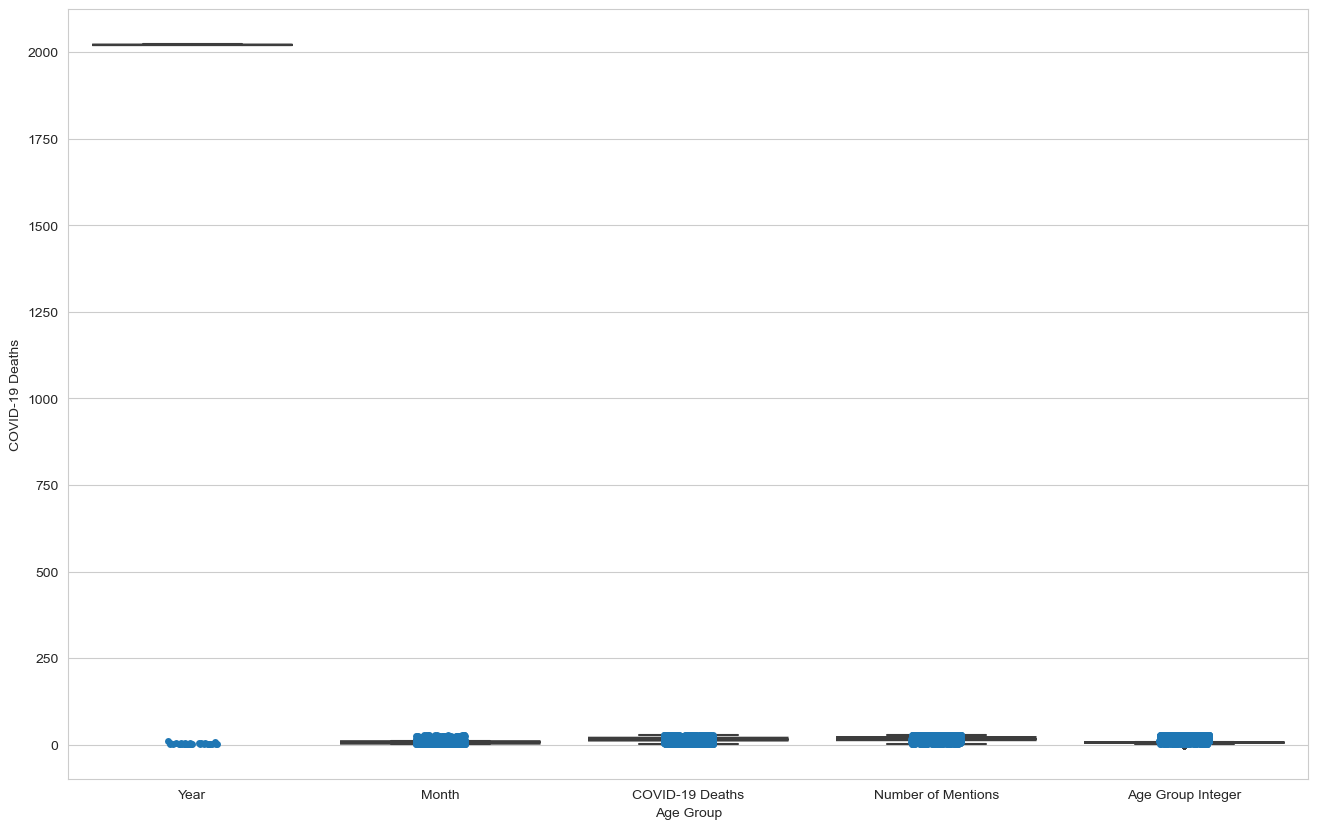

In [82]:
import seaborn as sns

# Set the style

fig = plt.figure(figsize = (16,10))
sns.set_style('whitegrid')

# Create a box plot
ax = sns.boxplot(data=data_filteredMentions30, notch=True)

# Create a strip plot
ax = sns.stripplot(x='Age Group', y='COVID-19 Deaths', data=data_filteredMentions30)

# Show the plot
plt.show()


C:\Users\Abdul\AppData\Local\Temp\ipykernel_18840\1761063354.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abdul\AppData\Local\Temp\ipykernel_18840\1761063354.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



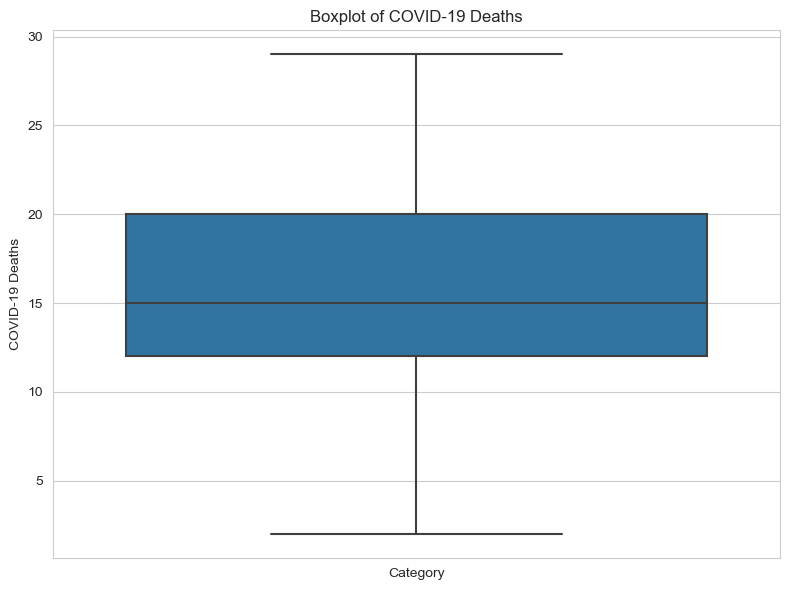

In [83]:
# Add a constant categorical column to the DataFrame
data_filteredMentions30['constant_category'] = 'Category'

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a box plot for 'COVID-19 Deaths'
sns.boxplot(x='constant_category', y='COVID-19 Deaths', data=data_filteredMentions30)
plt.title('Boxplot of COVID-19 Deaths')
plt.xlabel('')

# Remove the constant category column from the DataFrame
data_filteredMentions30.drop('constant_category', axis=1, inplace=True)

plt.tight_layout()
plt.show()


In [84]:
import numpy as np

# Calculate Z-scores for COVID-19 Deaths and Number of Mentions columns
z_scores_deaths = np.abs((data_filteredMentions30['COVID-19 Deaths'] - data_filteredMentions30['COVID-19 Deaths'].mean()) / data_filteredMentions30['COVID-19 Deaths'].std())
z_scores_mentions = np.abs((data_filteredMentions30['Number of Mentions'] - data_filteredMentions30['Number of Mentions'].mean()) / data_filteredMentions30['Number of Mentions'].std())

# Define threshold for Z-scores
threshold = 3

# Identify outliers using Z-score method
outliers_mask = (z_scores_deaths > threshold) | (z_scores_mentions > threshold)

# Remove outliers from the DataFrame
data_filteredMentions30 = data_filteredMentions30[~outliers_mask]

# Print the shape of the filtered data
print("Filtered data shape:", data_filteredMentions30.shape)


print(data_filteredMentions30.info())

print(data_filteredMentions30.describe())



Filtered data shape: (59775, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 59775 entries, 12452 to 620977
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Date          59775 non-null  object 
 1   End Date            59775 non-null  object 
 2   Year                59775 non-null  float64
 3   Month               53660 non-null  float64
 4   State               59775 non-null  object 
 5   Condition Group     59775 non-null  object 
 6   Condition           59775 non-null  object 
 7   Age Group           59775 non-null  object 
 8   COVID-19 Deaths     59775 non-null  float64
 9   Number of Mentions  59775 non-null  float64
 10  Age Group Integer   47626 non-null  float64
dtypes: float64(5), object(6)
memory usage: 5.5+ MB
None
               Year         Month  COVID-19 Deaths  Number of Mentions  \
count  59775.000000  53660.000000     59775.000000        59775.000000   
mean    2021.311

In [11]:
hey = data_filteredMentions30["Number of Mentions"].max()
print(hey)

29.0


Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64


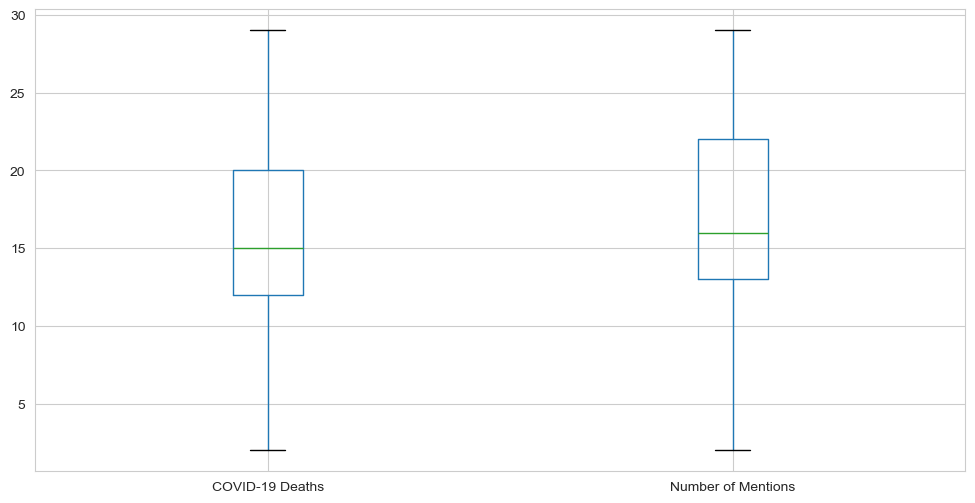

Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64


In [85]:
print(data_filteredMentions30.count())
# Select columns for box plot
columns_for_boxplot = ['COVID-19 Deaths', 'Number of Mentions']


fig = plt.figure(figsize=(12, 6))
# Select data for box plot
data_for_boxplot = data_filteredMentions30[columns_for_boxplot]

# Plot box plot for selected columns
data_for_boxplot.boxplot()

plt.show()

print(data_filteredMentions30.count())


F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



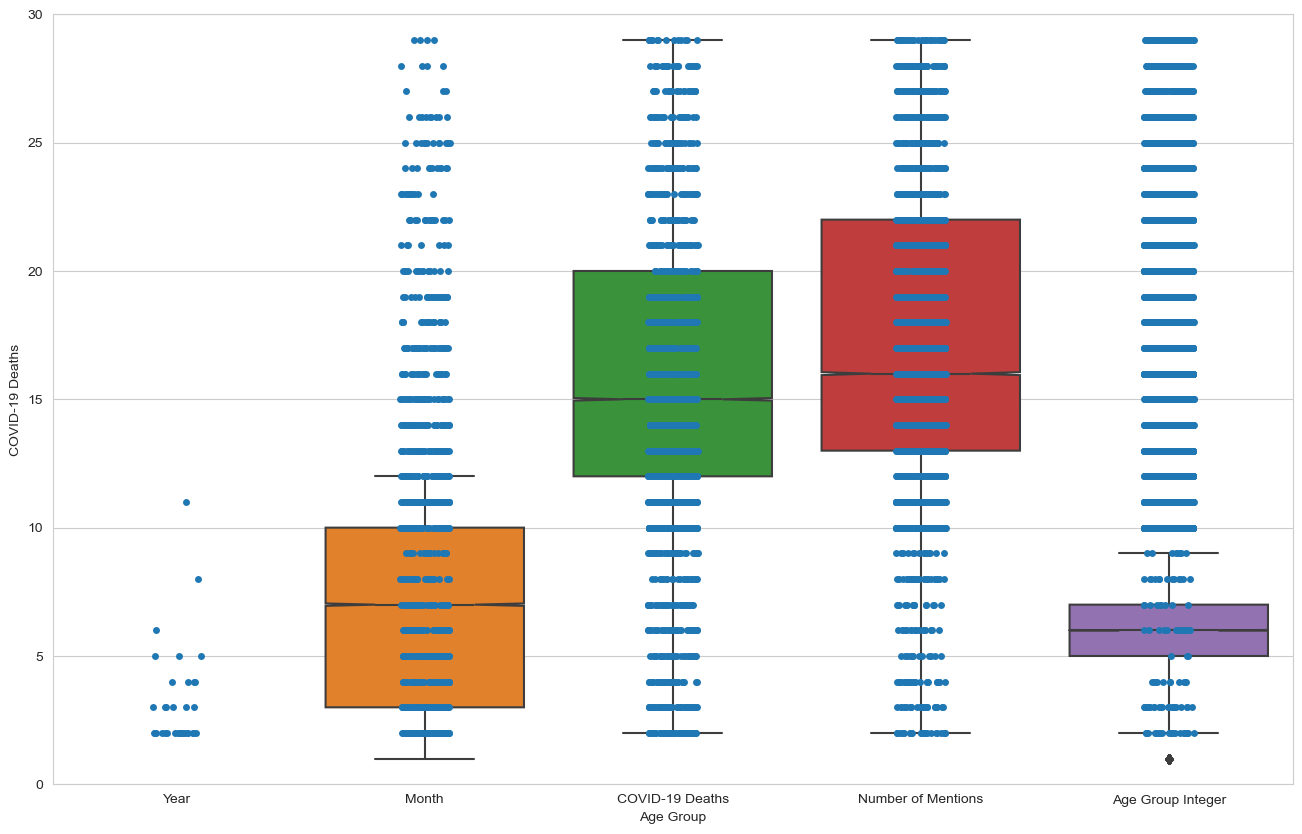

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(16, 10))

# Create a box plot
sns.boxplot(data=data_filteredMentions30, notch=True, ax=ax)

# Create a strip plot
sns.stripplot(x='Age Group', y='COVID-19 Deaths', data=data_filteredMentions30, ax=ax)

# Adjust y-axis limits
plt.ylim(0, 30)  # Set the lower limit of y-axis to 0 and upper limit to 50

# Show the plot
plt.show()


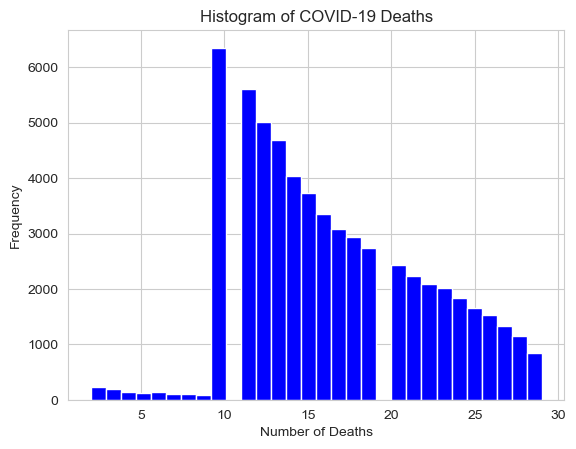

In [87]:
# Plot histogram for 'COVID-19 Deaths'
plt.hist(data_filteredMentions30['COVID-19 Deaths'], bins=30, color='blue')
plt.title('Histogram of COVID-19 Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()


In [88]:
mine = (data_filteredMentions30[(data_filteredMentions30['Number of Mentions'] < 30) & (data_filteredMentions30['COVID-19 Deaths'] > 1)].count())
print(mine) #Seing How much deaths that counter of some condition and it was mentioned so low times 
print (data_filteredMentions30["COVID-19 Deaths"].count())
print(data_filteredMentions30['Number of Mentions'].count())
print(data_filteredMentions30['Number of Mentions'].max())  # We Are working on 30 Mentions 

mine = (data_filteredMentions30[(data_filteredMentions30['Number of Mentions'] < 30) & (data_filteredMentions30['COVID-19 Deaths'] < 10)].count())
print(mine) #Seing How much deaths that counter of some condition and it was mentioned so low times 
# sor there is 1000 deaths of the 60k that died of conditions that wasn't rare but still 1/60 not small percentage 

Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64
59775
59775
29.0
Start Date            1116
End Date              1116
Year                  1116
Month                 1076
State                 1116
Condition Group       1116
Condition             1116
Age Group             1116
COVID-19 Deaths       1116
Number of Mentions    1116
Age Group Integer     1099
dtype: int64


In [16]:
mine = (data_filteredMentions30[data_filteredMentions30["Number of Mentions"] < 30]).count()
print(mine)
mine2 = (data_filteredMentions30[data_filteredMentions30["COVID-19 Deaths"] > 1 ]).count()
print(mine2)

max_covid_deaths = data_filteredMentions30["COVID-19 Deaths"].max()
print(max_covid_deaths) # 22 death 

mine3 = (data_filteredMentions30[(data_filteredMentions30['Number of Mentions'] < 20) & (data_filteredMentions30['COVID-19 Deaths'] > 10)].count())
print(mine3)  

# Filter the data based on conditions
filtered_data = data_filteredMentions30[(data_filteredMentions30['COVID-19 Deaths'] < 22) & (data_filteredMentions30['Number of Mentions'] < 30)]



Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64
Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64
29.0
Start Date            31639
End Date              31639
Year                  31639
Month                 28607
State                 31639
Condition Group       31639
Condition             31639
Age Group             31639
COVID-19 Deaths       31639
Number of Mentions    31639
Age Group Integer     25524
dtype: int64


In [89]:
# Filter the data where the number of mentions is less than 30 and COVID-19 deaths is greater than 1
data_filteredMentions30 = data_filteredMentions30[(data_filteredMentions30['Number of Mentions'] < 30) & (data_filteredMentions30['COVID-19 Deaths'] > 1)]

print(data_filteredMentions30.count())
print (data_filteredMentions30.count()) #####################################################################################
# Group the data by the 'Condition' column and count the occurrences of each condition
condition_counts = data_filteredMentions30['Condition'].value_counts()

# Print the condition and the number of COVID-19 deaths for each condition
for condition, count in condition_counts.items():
    print(f"Condition: {condition}, COVID-19 Deaths: {count}")
'''  In the United States, influenza virus and bacterial pneumonia are known to be the leading causes of hospitalization in the winter season. 
   Although healthcare workers are knowledgeable about the management of these co-infections, with the coronavirus disease 2019 (COVID-19)
    global pandemic that occurred in 2019, a significant change has occurred. The symptoms and clinical manifestations of COVID-19 are similar
    to that of influenza virus and bacterial pneumonia which can present a unique challenge for healthcare workers. Many reports are available
        for influenza virus and bacterial pneumonia but none about influenza, bacterial pneumonia, and COVID-19 co-infection.'''

Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64
Start Date            59775
End Date              59775
Year                  59775
Month                 53660
State                 59775
Condition Group       59775
Condition             59775
Age Group             59775
COVID-19 Deaths       59775
Number of Mentions    59775
Age Group Integer     47626
dtype: int64
Condition: COVID-19, COVID-19 Deaths: 3694
Condition: Influenza and pneumonia, COVID-19 Deaths: 3606
Condition: Respiratory failure, COVID-19 Deaths: 3402
Condition: Hypertensive diseases, COVID-19 Deaths: 3348
Condition: Diabetes, COVID-19 Deaths: 3192
Condition: Sepsis, COVID-19 Deaths: 2949
Condition: Renal failure, COVID-19 Deaths: 2944
Condition: Chro

'  In the United States, influenza virus and bacterial pneumonia are known to be the leading causes of hospitalization in the winter season. \n   Although healthcare workers are knowledgeable about the management of these co-infections, with the coronavirus disease 2019 (COVID-19)\n    global pandemic that occurred in 2019, a significant change has occurred. The symptoms and clinical manifestations of COVID-19 are similar\n    to that of influenza virus and bacterial pneumonia which can present a unique challenge for healthcare workers. Many reports are available\n        for influenza virus and bacterial pneumonia but none about influenza, bacterial pneumonia, and COVID-19 co-infection.'

In [90]:

grouped_data = data_filteredMentions30.groupby(['Age Group Integer', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

for index, row in grouped_data.iterrows():
    print(f"Age Group: {row['Age Group Integer']}, Condition: {row['Condition']}, COVID-19 Deaths: {row['COVID-19 Deaths']}")


Age Group: 1.0, Condition: Adult respiratory distress syndrome, COVID-19 Deaths: 438.0
Age Group: 1.0, Condition: All other conditions and causes (residual), COVID-19 Deaths: 617.0
Age Group: 1.0, Condition: COVID-19, COVID-19 Deaths: 2218.0
Age Group: 1.0, Condition: Cardiac arrest, COVID-19 Deaths: 413.0
Age Group: 1.0, Condition: Cardiac arrhythmia, COVID-19 Deaths: 112.0
Age Group: 1.0, Condition: Cerebrovascular diseases, COVID-19 Deaths: 129.0
Age Group: 1.0, Condition: Chronic lower respiratory diseases, COVID-19 Deaths: 236.0
Age Group: 1.0, Condition: Diabetes, COVID-19 Deaths: 318.0
Age Group: 1.0, Condition: Heart failure, COVID-19 Deaths: 111.0
Age Group: 1.0, Condition: Hypertensive diseases, COVID-19 Deaths: 152.0
Age Group: 1.0, Condition: Influenza and pneumonia, COVID-19 Deaths: 1177.0
Age Group: 1.0, Condition: Intentional and unintentional injury, poisoning, and other adverse events, COVID-19 Deaths: 182.0
Age Group: 1.0, Condition: Ischemic heart disease, COVID-19 D

In [91]:
import pandas as pd

# Group the data by age group and condition, calculate the sum of COVID-19 deaths for each group
grouped_data = data_filteredMentions30.groupby(['Age Group Integer', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

# Iterate over each age group
for age_group in grouped_data['Age Group Integer'].unique():
    # Filter data for the current age group
    age_group_data = grouped_data[grouped_data['Age Group Integer'] == age_group]
    # Sort the data by COVID-19 deaths in descending order
    age_group_data = age_group_data.sort_values(by='COVID-19 Deaths', ascending=False)
    # Select the highest condition for the current age group
    highest_condition = age_group_data.iloc[0]
    # Print the highest condition for the current age group
    print(f"Age Group: {highest_condition['Age Group Integer']}, Condition: {highest_condition['Condition']}, COVID-19 Deaths: {highest_condition['COVID-19 Deaths']}")

# WE can discover from here that the main reason for the youth death is the covid itself 

'''For younger age groups (Age Group 1 to 5), the main cause of death appears to be COVID-19 itself.
This is evident from the fact that the highest condition for these age groups is COVID-19
    , and the COVID-19 death counts are significantly higher compared to other conditions.
However, for older age groups (Age Group 6 to 9), the highest condition is not COVID-19
    but other underlying health conditions such as hypertensive diseases and heart failure.
    This suggests that COVID-19 might exacerbate existing health conditions in older individuals,
    making them more susceptible to severe illness and death. In other words, COVID-19 seems to act
    as a catalyst or complicating factor for other illnesses in older age groups, leading to a higher overall mortality rate.'''

Age Group: 1.0, Condition: COVID-19, COVID-19 Deaths: 2218.0
Age Group: 2.0, Condition: COVID-19, COVID-19 Deaths: 4448.0
Age Group: 3.0, Condition: COVID-19, COVID-19 Deaths: 7295.0
Age Group: 4.0, Condition: COVID-19, COVID-19 Deaths: 9063.0
Age Group: 5.0, Condition: COVID-19, COVID-19 Deaths: 10545.0
Age Group: 6.0, Condition: Hypertensive diseases, COVID-19 Deaths: 9382.0
Age Group: 7.0, Condition: Hypertensive diseases, COVID-19 Deaths: 11216.0
Age Group: 8.0, Condition: Heart failure, COVID-19 Deaths: 12000.0
Age Group: 9.0, Condition: COVID-19, COVID-19 Deaths: 39.0


'For younger age groups (Age Group 1 to 5), the main cause of death appears to be COVID-19 itself.\nThis is evident from the fact that the highest condition for these age groups is COVID-19\n    , and the COVID-19 death counts are significantly higher compared to other conditions.\nHowever, for older age groups (Age Group 6 to 9), the highest condition is not COVID-19\n    but other underlying health conditions such as hypertensive diseases and heart failure.\n    This suggests that COVID-19 might exacerbate existing health conditions in older individuals,\n    making them more susceptible to severe illness and death. In other words, COVID-19 seems to act\n    as a catalyst or complicating factor for other illnesses in older age groups, leading to a higher overall mortality rate.'

In [92]:
# Group the data by age group and condition, calculate the sum of COVID-19 deaths and mentions for each group
print(data_filteredMentions30['Number of Mentions'].count())
print(data_filteredMentions30['Number of Mentions'].max()) 
grouped_data = data_filteredMentions30.groupby(['Age Group Integer', 'Condition']).agg({'COVID-19 Deaths': 'sum', 'Number of Mentions': 'sum'}).reset_index()

print(grouped_data['Number of Mentions'].count())
print(grouped_data['Number of Mentions'].max()) # 12280
# Iterate over each age group
for age_group in grouped_data['Age Group Integer'].unique():
    # Filter data for the current age group
    age_group_data = grouped_data[grouped_data['Age Group Integer'] == age_group]
    # Filter the data to include only conditions where mentions are 30 or less
    age_group_data = age_group_data[age_group_data['Number of Mentions'] < 1000 ]
    # If there are no conditions with mentions 30 or less, skip to the next age group
    if age_group_data.empty:
        continue
    # Sort the data by COVID-19 deaths and mentions in descending order
    age_group_data = age_group_data.sort_values(by=['COVID-19 Deaths', 'Number of Mentions'], ascending=False)
    # Select the highest condition for the current age group
    highest_condition = age_group_data.iloc[0]
    # Print the highest condition for the current age group
    print(f"Age Group: {highest_condition['Age Group Integer']}, Condition: {highest_condition['Condition']}, COVID-19 Deaths: {highest_condition['COVID-19 Deaths']}, Mentions: {highest_condition['Number of Mentions']}")

# for number of mentions < 1000 

# this indicates that from Respiratory failure, Diabetes, Chronic lower respiratory diseases  44 years : 
# 1/12 of the mentions indicates that those illnesses was affecting so bad on the youth and 1/12 is kinda low mentions based on that number of deathes 
# that doctors didn't notice 

# Our meta‐analysis demonstrates that diabetes is significantly associated with increased odds of severe COVID‐19, 
# increased ARDS rate, mortality, and need for mechanical ventilation in hospitalized patients. We also estimated an overall 
# pooled prevalence of diabetes of 31% in hospitalized COVID‐19 patients.
#شعار المعاهد الوطنية للصحة 


59775
29.0
190
12280.0
Age Group: 1.0, Condition: Respiratory failure, COVID-19 Deaths: 814.0, Mentions: 855.0
Age Group: 2.0, Condition: Diabetes, COVID-19 Deaths: 876.0, Mentions: 884.0
Age Group: 3.0, Condition: Chronic lower respiratory diseases, COVID-19 Deaths: 958.0, Mentions: 980.0
Age Group: 4.0, Condition: Respiratory arrest, COVID-19 Deaths: 957.0, Mentions: 957.0
Age Group: 5.0, Condition: Alzheimer disease, COVID-19 Deaths: 304.0, Mentions: 304.0
Age Group: 9.0, Condition: COVID-19, COVID-19 Deaths: 39.0, Mentions: 39.0


In [21]:
states_data = data["State"].unique()
print("Unique states extracted:", states_data)
print("Number of unique states:", len(states_data))

Unique states extracted: ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'New York City'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'Puerto Rico']
Number of unique states: 54


In [22]:
state_death_counts = data_filteredMentions30.groupby('State')['COVID-19 Deaths'].sum()
print(state_death_counts)
print(data_filteredMentions30["Number of Mentions"].count())

State
Alabama                 22696.0
Alaska                   4545.0
Arizona                 24572.0
Arkansas                18965.0
California              26560.0
Colorado                21755.0
Connecticut             15111.0
Delaware                 9521.0
District of Columbia     6872.0
Florida                 26349.0
Georgia                 26516.0
Hawaii                   6302.0
Idaho                   11972.0
Illinois                24330.0
Indiana                 23396.0
Iowa                    17396.0
Kansas                  15082.0
Kentucky                24481.0
Louisiana               21800.0
Maine                    7216.0
Maryland                22488.0
Massachusetts           19917.0
Michigan                24763.0
Minnesota               21436.0
Mississippi             23043.0
Missouri                21999.0
Montana                 10287.0
Nebraska                12532.0
Nevada                  17738.0
New Hampshire            8076.0
New Jersey              24133.0
Ne

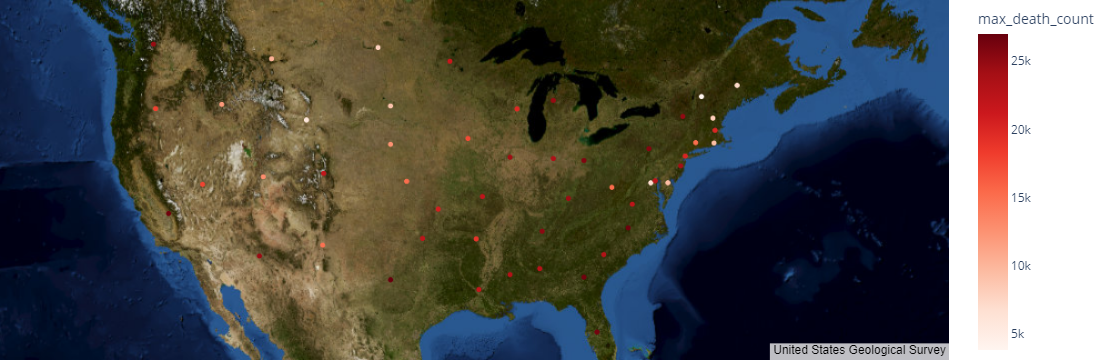

In [93]:
import pandas as pd
import plotly.express as px

# Your existing state_coordinates dictionary
state_coordinates = {
    'United States': (37.0902, -95.7129),
    'Alabama': (32.8067, -86.7911),
    'Alaska': (61.3707, -152.4044),
    'Arizona': (33.7298, -111.4312),
    'Arkansas': (34.9697, -92.3731),
    'California': (36.7783, -119.4179),
    'Colorado': (39.5501, -105.7821),
    'Connecticut': (41.6032, -73.0877),
    'Delaware': (38.9108, -75.5277),
    'District of Columbia': (38.9072, -77.0369),
    'Florida': (27.9944, -81.7603),
    'Georgia': (32.1656, -82.9001),
    'Hawaii': (19.8968, -155.5828),
    'Idaho': (44.0682, -114.742),
    'Illinois': (40.6331, -89.3985),
    'Indiana': (40.5512, -85.6024),
    'Iowa': (41.878, -93.0977),
    'Kansas': (39.0119, -98.4842),
    'Kentucky': (37.8393, -84.270),
    'Louisiana': (31.2448, -92.145),
    'Maine': (45.2538, -69.4455),
    'Maryland': (39.0458, -76.6413),
    'Massachusetts': (42.4072, -71.3824),
    'Michigan': (44.3148, -85.6024),
    'Minnesota': (46.7296, -94.6859),
    'Mississippi': (32.3547, -89.3985),
    'Missouri': (37.9643, -91.8318),
    'Montana': (46.8797, -110.3626),
    'Nebraska': (41.4925, -99.9018),
    'Nevada': (38.8026, -116.4194),
    'New Hampshire': (43.1939, -71.5724),
    'New Jersey': (40.0583, -74.4057),
    'New Mexico': (34.5199, -105.8701),
    'New York': (43.2994, -74.2179),
    'New York City': (40.7128, -74.006),
    'North Carolina': (35.7596, -79.0193),
    'North Dakota': (47.5515, -101.002),
    'Ohio': (40.4173, -82.9071),
    'Oklahoma': (35.0078, -97.0929),
    'Oregon': (43.8041, -120.5542),
    'Pennsylvania': (41.2033, -77.1945),
    'Rhode Island': (41.5801, -71.4774),
    'South Carolina': (33.8361, -81.1637),
    'South Dakota': (43.9695, -99.9018),
    'Tennessee': (35.5175, -86.5804),
    'Texas': (31.9686, -99.9018),
    'Utah': (39.3209, -111.0937),
    'Vermont': (44.5588, -72.5778),
    'Virginia': (37.4316, -78.6569),
    'Washington': (47.7511, -120.7401),
    'West Virginia': (38.5976, -80.4549),
    'Wisconsin': (43.7844, -88.7879),
    'Wyoming': (43.076, -107.2903),
    'Puerto Rico': (18.2208, -66.5901)
}

# Group the data by state and calculate the sum of COVID-19 deaths for each state
state_death_counts = data_filteredMentions30.groupby('State')['COVID-19 Deaths'].sum()

# Find the state with the maximum death count
state_max_death_count = state_death_counts.idxmax()

# Convert state_death_counts Series to a dictionary
state_max_death_count_dict = state_death_counts.to_dict()

# Create DataFrame
df = pd.DataFrame({
    "state": list(state_max_death_count_dict.keys()),
    "max_death_count": list(state_max_death_count_dict.values())
})

fig = px.scatter_mapbox(df, 
                        lat=[state_coordinates[state][0] for state in df["state"]], 
                        lon=[state_coordinates[state][1] for state in df["state"]], 
                        color="max_death_count", 
                        size_max=25, zoom=3, mapbox_style="satellite",
                        hover_name=df["state"],
                        color_continuous_scale="reds")  # Specify color scale

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

           # 60K mentions 

463274.0
1241
463274.0
              Year       Month  COVID-19 Deaths  Number of Mentions  \
count  1241.000000  837.000000      1241.000000         1241.000000   
mean   2021.237712    6.514934        26.414988           31.694601   
std       0.886673    3.509908        44.269822           54.551273   
min    2020.000000    1.000000         2.000000            2.000000   
25%    2021.000000    3.000000         6.000000            7.000000   
50%    2021.000000    7.000000        13.000000           15.000000   
75%    2022.000000    9.000000        26.000000           33.000000   
max    2023.000000   12.000000       441.000000          649.000000   

       Age Group Integer  
count             1241.0  
mean                 1.0  
std                  0.0  
min                  1.0  
25%                  1.0  
50%                  1.0  
75%                  1.0  
max                  1.0  
<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 12420 to 568824
Data columns (total

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



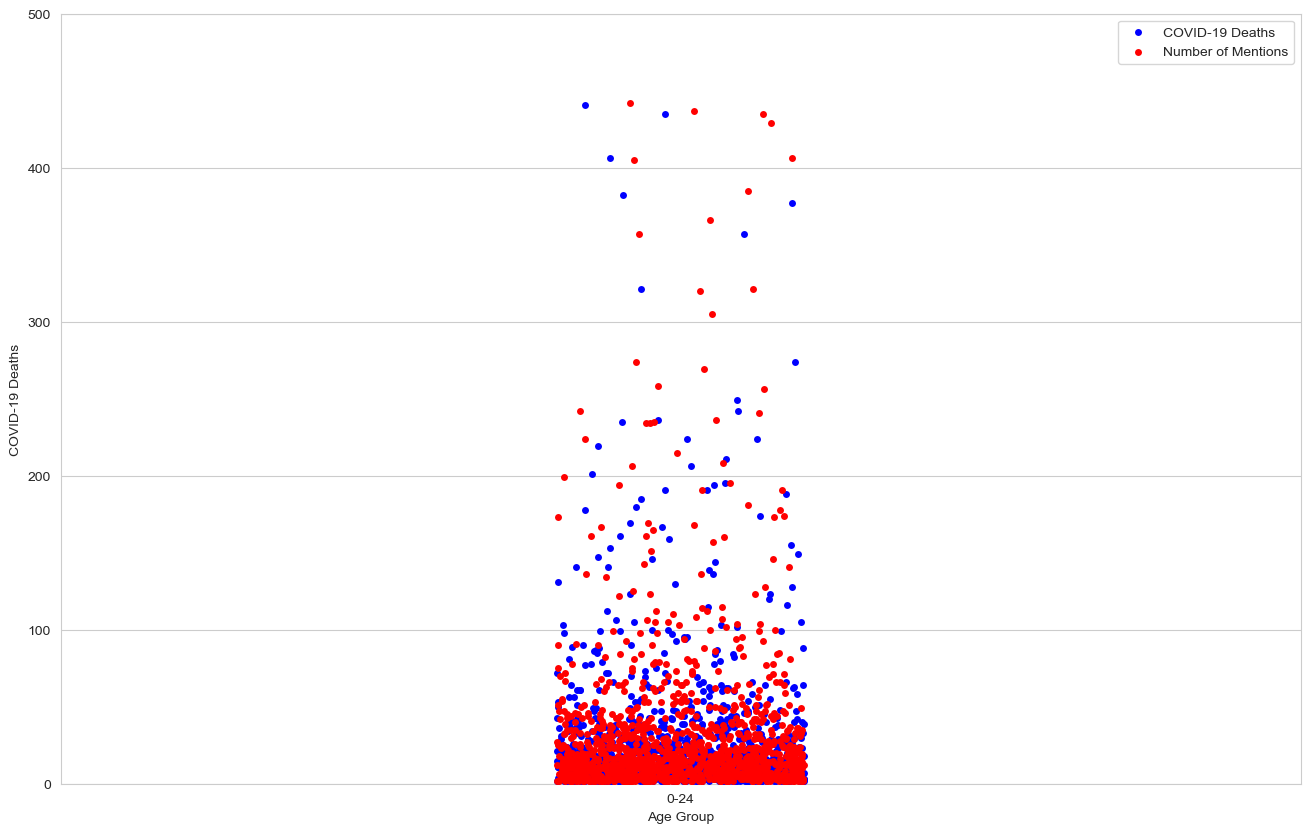

In [104]:
print (data["Number of Mentions"].max())
print(data[(data["Age Group Integer"] == 1.0) & (data["COVID-19 Deaths"] > 1) & (data["COVID-19 Deaths"] < 500)].shape[0])
print (data["COVID-19 Deaths"].max())

YouthData = data[(data["Age Group Integer"] == 1.0) & 
                 (data["COVID-19 Deaths"] > 1) & 
                 (data["COVID-19 Deaths"] < 500)]
print(YouthData.describe())
print(YouthData.info())
print(YouthData.count())

# So we will work on the young age deaths only 

# Set the style
sns.set_style('whitegrid')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(16, 10))

# Create a box plot

# Create a strip plot for COVID-19 Deaths
sns.stripplot(x='Age Group', y='COVID-19 Deaths', data=YouthData, ax=ax, color='blue', label='COVID-19 Deaths')

# Create a strip plot for Number of Mentions
sns.stripplot(x='Age Group', y='Number of Mentions', data=YouthData, ax=ax, color='red', label='Number of Mentions')

# Set y-axis limit
ax.set_ylim(0, 500)

# Add legend
plt.legend()

# Show the plot
plt.show()






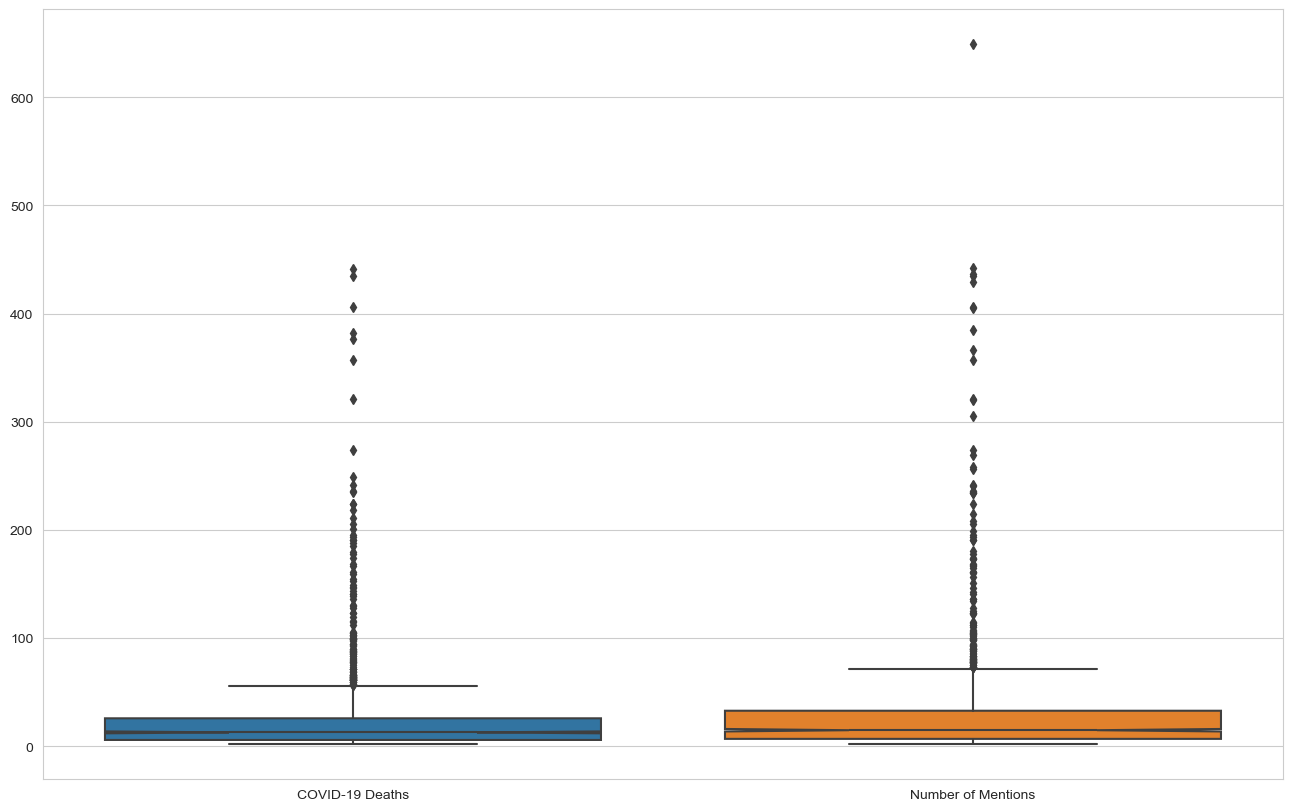

In [105]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.boxplot(data=YouthData[['COVID-19 Deaths', 'Number of Mentions']], notch=True, ax=ax)
plt.show()

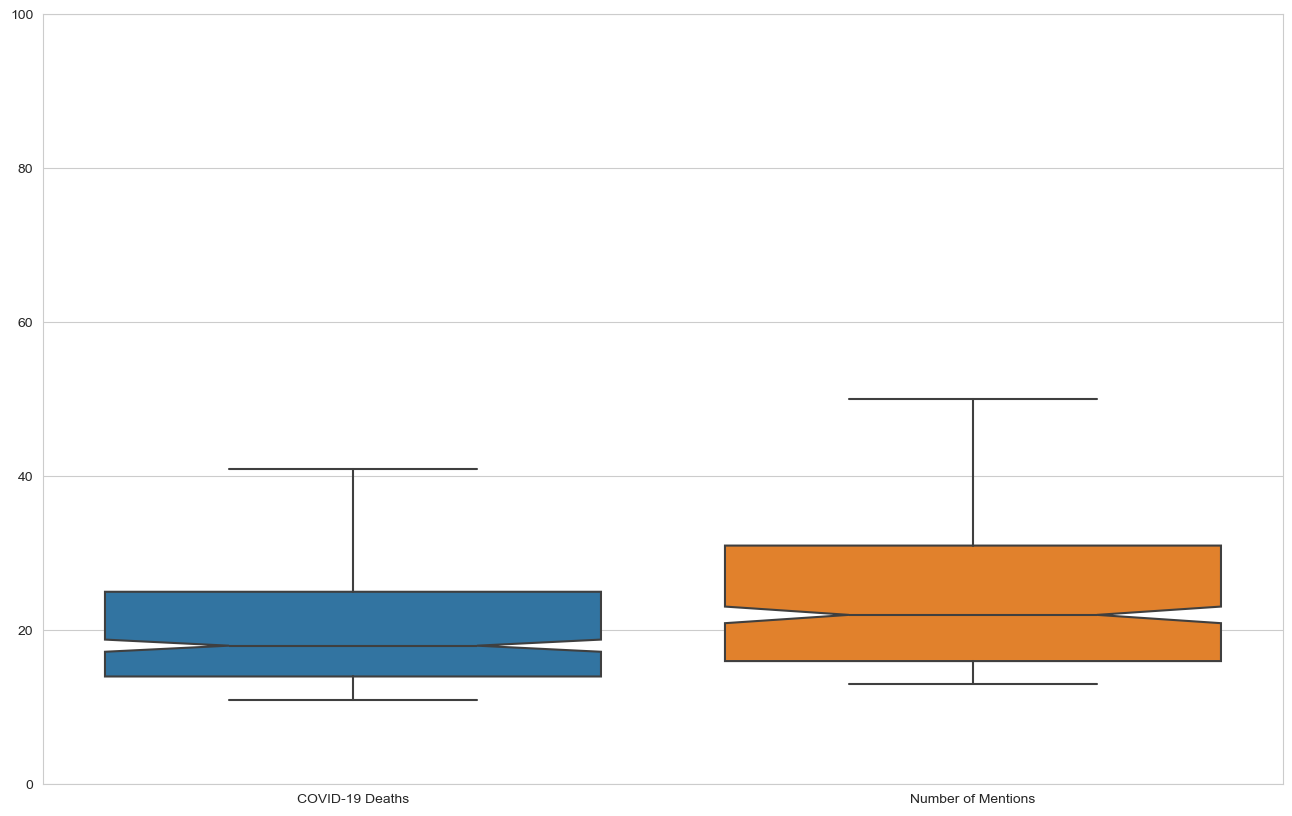

In [106]:
import numpy as np

# Calculate z-scores for COVID-19 Deaths and Number of Mentions in the youth data
z_scores_covid = (YouthData['COVID-19 Deaths'] - YouthData['COVID-19 Deaths'].mean()) / YouthData['COVID-19 Deaths'].std()
z_scores_mentions = (YouthData['Number of Mentions'] - YouthData['Number of Mentions'].mean()) / YouthData['Number of Mentions'].std()

# Set threshold for z-score to identify outliers (e.g., 3)
threshold = 0.35

YouthData_no_outliers = YouthData[(np.abs(z_scores_covid) < threshold) & (np.abs(z_scores_mentions) < threshold)]


sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16, 10))

sns.boxplot(data=YouthData_no_outliers[['COVID-19 Deaths', 'Number of Mentions']], 
            notch=True, 
            ax=ax)

ax.set_ylim(0, 100)

plt.show()


In [107]:
print(YouthData_no_outliers['COVID-19 Deaths'].count())
print(YouthData_no_outliers['COVID-19 Deaths'].max())
print(YouthData_no_outliers.duplicated().sum())
print(YouthData_no_outliers.isnull().sum())


477
41.0
0
Start Date              0
End Date                0
Year                    0
Month                 229
State                   0
Condition Group         0
Condition               0
Age Group               0
COVID-19 Deaths         0
Number of Mentions      0
Age Group Integer       0
dtype: int64


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = YouthData_no_outliers[['COVID-19 Deaths']]

y = YouthData_no_outliers["Number of Mentions"]
     
# Step 1: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Analyze your data (skipped for brevity)

# Step 3: Train a baseline model without normalization or scaling
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Model Accuracy:", baseline_accuracy)

# Step 4: Normalize or scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train models with scaled data
scaled_model = LogisticRegression()
scaled_model.fit(X_train_scaled, y_train)
scaled_predictions = scaled_model.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, scaled_predictions)
print("Model Accuracy with Scaled Data:", scaled_accuracy)

# Step 6: Compare results
print("Accuracy Improvement:", scaled_accuracy - baseline_accuracy)

    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Step 1: Train a decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the performance of each model using accuracy score
decision_tree_accuracy = decision_tree_model.score(X_test_scaled, y_test)

print("Decision Tree Accuracy:", decision_tree_accuracy)


Baseline Model Accuracy: 0.40625
Model Accuracy with Scaled Data: 0.2916666666666667
Accuracy Improvement: -0.11458333333333331
Decision Tree Accuracy: 0.5833333333333334


F:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



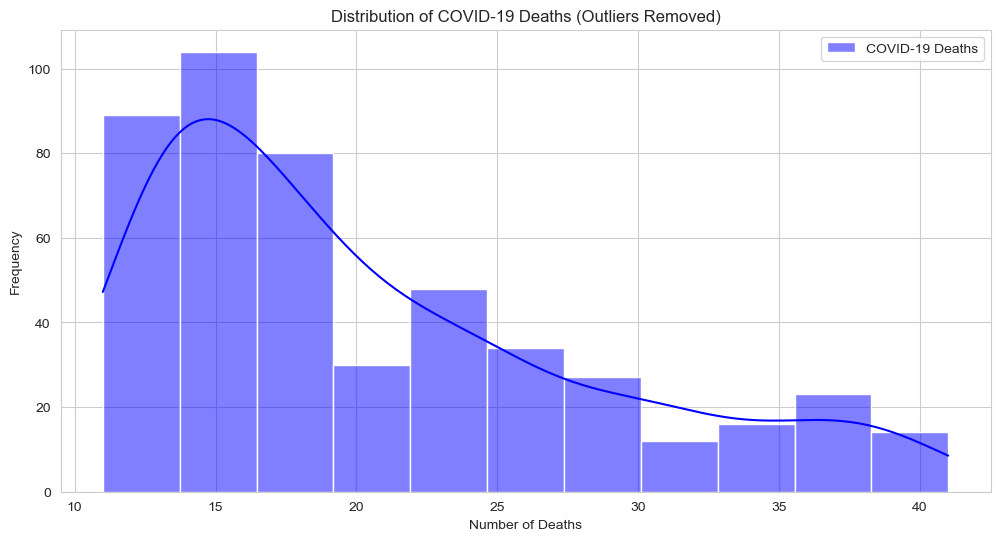

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



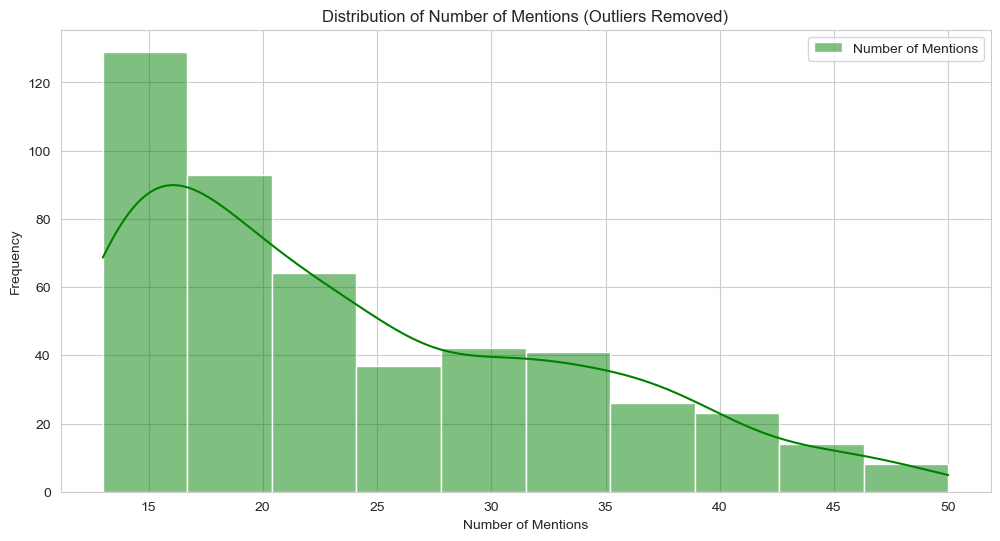

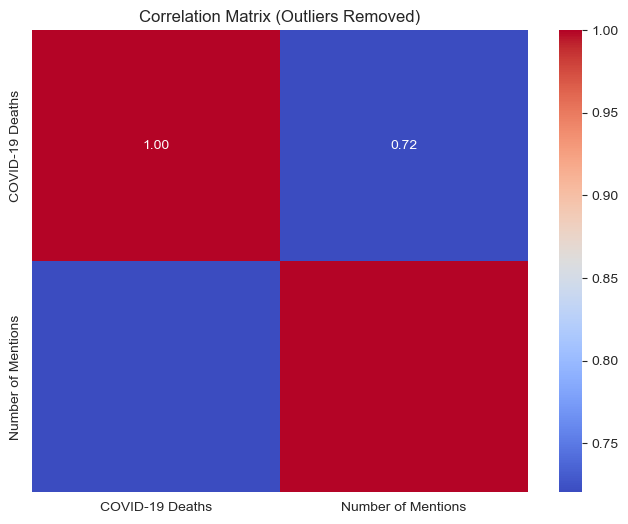

Correlation coefficient between COVID-19 Deaths and Number of Mentions: 0.7202963644600956


In [109]:
# Visualize Distributions
plt.figure(figsize=(12, 6))
sns.histplot(YouthData_no_outliers['COVID-19 Deaths'], kde=True, color='blue', label='COVID-19 Deaths')
plt.title('Distribution of COVID-19 Deaths (Outliers Removed)')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(YouthData_no_outliers['Number of Mentions'], kde=True, color='green', label='Number of Mentions')
plt.title('Distribution of Number of Mentions (Outliers Removed)')
plt.xlabel('Number of Mentions')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Explore Correlations
correlation_matrix = YouthData_no_outliers[['COVID-19 Deaths', 'Number of Mentions']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Outliers Removed)')
plt.show()


# Compute Summary Statistics
summary_statistics = YouthData_no_outliers.describe()
# Accessing correlation coefficients
correlation_matrix = YouthData_no_outliers[['COVID-19 Deaths', 'Number of Mentions']].corr()

# Print correlation coefficients
print("Correlation coefficient between COVID-19 Deaths and Number of Mentions:",
      correlation_matrix.loc['COVID-19 Deaths', 'Number of Mentions'])


C:\Users\Abdul\AppData\Local\Temp\ipykernel_18840\2646622847.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abdul\AppData\Local\Temp\ipykernel_18840\2646622847.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



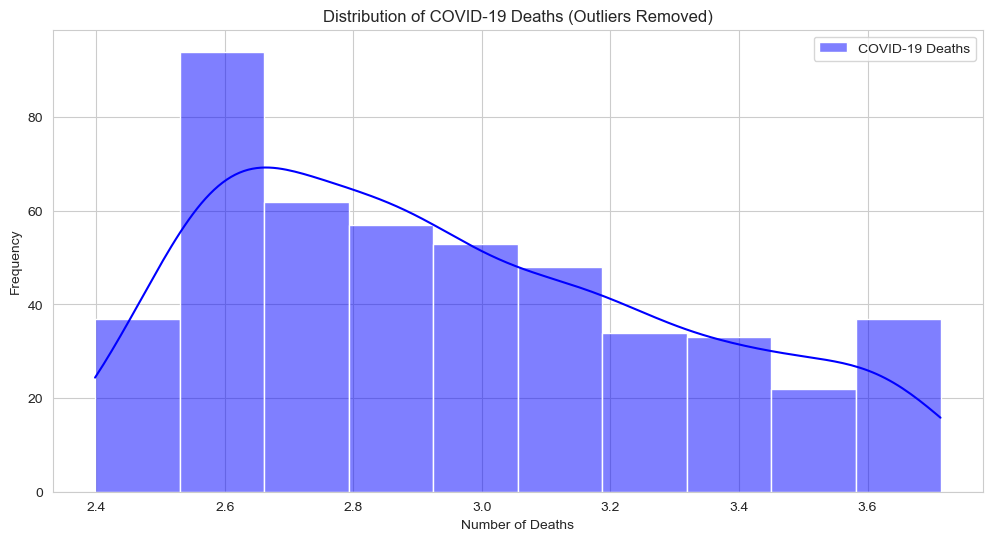

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



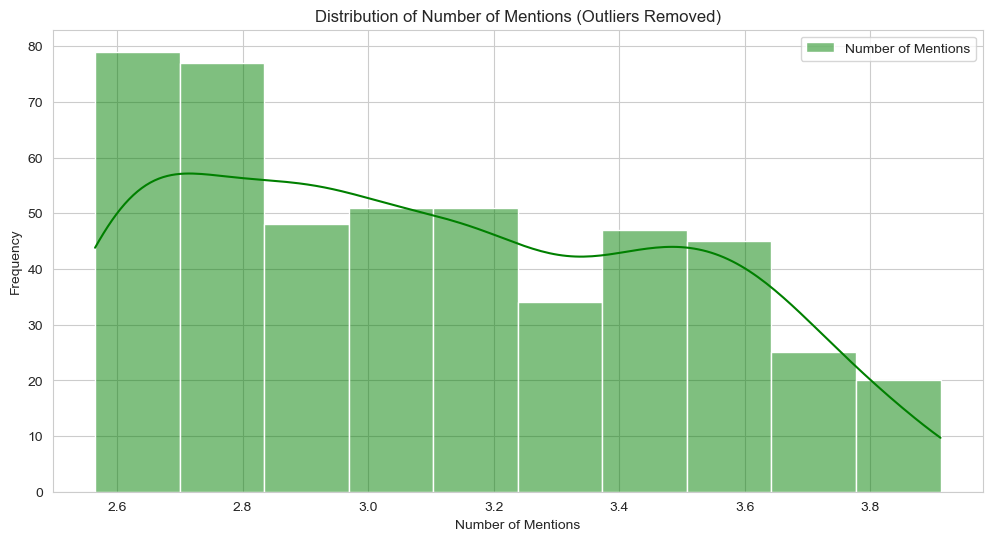

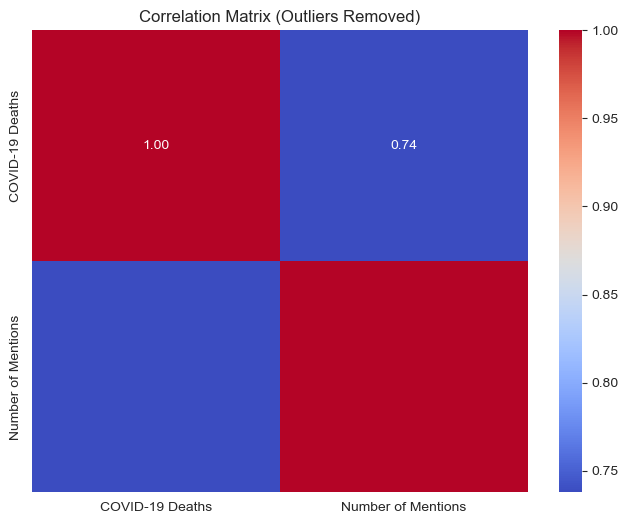

Correlation coefficient between COVID-19 Deaths and Number of Mentions: 0.7377754262585187
              Year       Month  COVID-19 Deaths  Number of Mentions  \
count   477.000000  248.000000       477.000000          477.000000   
mean   2021.148847    6.629032         2.955791            3.104784   
std       0.786482    3.823998         0.355315            0.379339   
min    2020.000000    1.000000         2.397895            2.564949   
25%    2021.000000    2.000000         2.639057            2.772589   
50%    2021.000000    8.000000         2.890372            3.091042   
75%    2022.000000   10.000000         3.218876            3.433987   
max    2023.000000   12.000000         3.713572            3.912023   

       Age Group Integer  
count              477.0  
mean                 1.0  
std                  0.0  
min                  1.0  
25%                  1.0  
50%                  1.0  
75%                  1.0  
max                  1.0  


In [110]:
 YouthData_no_outliers['COVID-19 Deaths'] = np.log(YouthData_no_outliers['COVID-19 Deaths'])
 YouthData_no_outliers['Number of Mentions'] = np.log(YouthData_no_outliers['Number of Mentions'])
# Visualize Distributions
plt.figure(figsize=(12, 6))
sns.histplot(YouthData_no_outliers['COVID-19 Deaths'], kde=True, color='blue', label='COVID-19 Deaths')
plt.title('Distribution of COVID-19 Deaths (Outliers Removed)')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(YouthData_no_outliers['Number of Mentions'], kde=True, color='green', label='Number of Mentions')
plt.title('Distribution of Number of Mentions (Outliers Removed)')
plt.xlabel('Number of Mentions')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Explore Correlations
correlation_matrix = YouthData_no_outliers[['COVID-19 Deaths', 'Number of Mentions']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Outliers Removed)')
plt.show()


# Compute Summary Statistics
summary_statistics = YouthData_no_outliers.describe()
# Accessing correlation coefficients
correlation_matrix = YouthData_no_outliers[['COVID-19 Deaths', 'Number of Mentions']].corr()

# Print correlation coefficients
print("Correlation coefficient between COVID-19 Deaths and Number of Mentions:",
      correlation_matrix.loc['COVID-19 Deaths', 'Number of Mentions'])

print (YouthData_no_outliers.describe())

In [111]:
# Group the data by 'State' and calculate the sum of 'COVID-19 Deaths' for each state
state_death_counts = YouthData_no_outliers.groupby('State')['COVID-19 Deaths'].sum()

# Find the state with the maximum number of deaths
state_max_deaths = state_death_counts.idxmax()
max_deaths = state_death_counts.max()

print("State with the most deaths:", state_max_deaths)
print("Number of deaths in the state:", max_deaths)

# Group the data by 'Condition' and calculate the sum of 'COVID-19 Deaths' for each condition
condition_death_counts = YouthData_no_outliers.groupby('Condition')['COVID-19 Deaths'].sum()

# Find the condition that caused the highest number of deaths
condition_max_deaths = condition_death_counts.idxmax()
max_deaths_condition = condition_death_counts.max()

print("Condition with the highest deaths:", condition_max_deaths)
print("Number of deaths due to this condition:", max_deaths_condition)

# Find the condition with the highest deaths but the lowest mentions
condition_mention_counts = YouthData_no_outliers.groupby('Condition')['Number of Mentions'].sum()
sorted_condition_mention_counts = condition_mention_counts.sort_values()
condition_highest_deaths_lowest_mentions = sorted_condition_mention_counts.idxmax()

print("Condition with the highest deaths but lowest mentions:", condition_highest_deaths_lowest_mentions)

# Filter the data for conditions other than COVID-19
non_covid_data = YouthData_no_outliers[~YouthData_no_outliers['Condition'].isin(['COVID-19', 'All other conditions and causes (residual)'])]

# Group the non-COVID data by 'Condition' and calculate the sum of 'COVID-19 Deaths' for each condition
non_covid_death_counts = non_covid_data.groupby('Condition')['COVID-19 Deaths'].sum()

# Find the condition that caused the highest number of deaths among non-COVID conditions
highest_non_covid_condition = non_covid_death_counts.idxmax()
highest_non_covid_deaths = non_covid_death_counts.max()

print("Condition with the highest deaths (excluding COVID-19):", highest_non_covid_condition)
print("Number of deaths due to this condition:", highest_non_covid_deaths)


State with the most deaths: United States
Number of deaths in the state: 511.1118777679199
Condition with the highest deaths: COVID-19
Number of deaths due to this condition: 363.7832636269271
Condition with the highest deaths but lowest mentions: COVID-19
Condition with the highest deaths (excluding COVID-19): Influenza and pneumonia
Number of deaths due to this condition: 205.6250251521748


In [112]:
# Concatenate non_covid_death_counts and condition_mention_counts into a single DataFrame
combined_data = pd.concat([non_covid_death_counts, condition_mention_counts], axis=1)
combined_data.columns = ['Sum of Deaths', 'Number of Mentions']

# Sort the DataFrame based on the sum of deaths in descending order
sorted_combined_data = combined_data.sort_values(by='Sum of Deaths', ascending=False)

# Print the sorted result
print("Sum of Deaths and Number of Mentions for Each Condition (excluding COVID-19) - Sorted:")
print(sorted_combined_data)

# From this result we can see that the Health field has done magnificent work handling the covid 19 

Sum of Deaths and Number of Mentions for Each Condition (excluding COVID-19) - Sorted:
                                                    Sum of Deaths  \
Condition                                                           
Influenza and pneumonia                                205.625025   
Respiratory failure                                    116.312669   
Obesity                                                 70.621655   
Other diseases of the circulatory system                61.163847   
Adult respiratory distress syndrome                     60.399206   
Other diseases of the respiratory system                51.827760   
Cardiac arrest                                          48.178959   
Sepsis                                                  42.757110   
Intentional and unintentional injury, poisoning...      37.282706   
Diabetes                                                32.060517   
Renal failure                                           30.351234   
Malignant neopla

In [113]:
# Group the data by condition and calculate the total number of deaths for each condition
condition_death_counts = YouthData_no_outliers.groupby('Condition')['COVID-19 Deaths'].sum()

# Calculate the total number of deaths across all conditions
total_deaths = condition_death_counts.sum()

# Calculate the percentage of deaths for each condition
percentage_deaths = (condition_death_counts / total_deaths) * 100

# Create a DataFrame to display the results

# Display the DataFrame
print("Percentage of Deaths for Each Condition:")
print(percentage_deaths)

print (YouthData_no_outliers.info())

Percentage of Deaths for Each Condition:
Condition
Adult respiratory distress syndrome                                           4.283899
All other conditions and causes (residual)                                   15.596182
COVID-19                                                                     25.801840
Cardiac arrest                                                                3.417160
Cardiac arrhythmia                                                            0.662063
Cerebrovascular diseases                                                      0.470477
Chronic lower respiratory diseases                                            0.976437
Diabetes                                                                      2.273937
Heart failure                                                                 0.489871
Hypertensive diseases                                                         0.451307
Influenza and pneumonia                                                      14

Condition
Adult respiratory distress syndrome                                           60.399206
All other conditions and causes (residual)                                   219.892456
COVID-19                                                                     363.783264
Cardiac arrest                                                                48.178959
Cardiac arrhythmia                                                             9.334503
Cerebrovascular diseases                                                       6.633318
Chronic lower respiratory diseases                                            13.766908
Diabetes                                                                      32.060517
Heart failure                                                                  6.906755
Hypertensive diseases                                                          6.363028
Influenza and pneumonia                                                      205.625025
Intentional and uninte

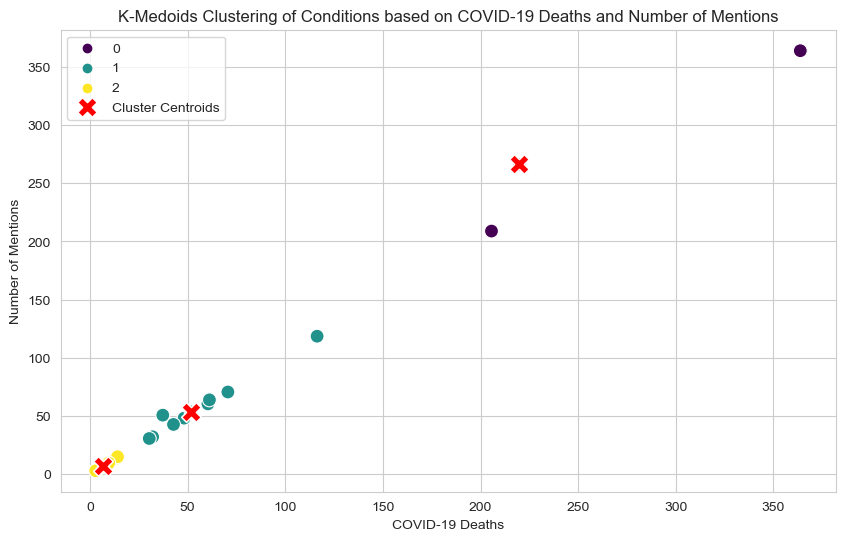

In [114]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

print(condition_death_counts)

# Group the data by 'Condition' and calculate the sum of 'COVID-19 Deaths' and 'Number of Mentions' for each condition
condition_death_mentions_counts = YouthData_no_outliers.groupby('Condition')[['COVID-19 Deaths', 'Number of Mentions']].sum().reset_index()

# Encode the 'Condition' column
label_encoder = LabelEncoder()
condition_death_mentions_counts['Condition_Encoded'] = label_encoder.fit_transform(condition_death_mentions_counts['Condition'])

# Select features for clustering
X = condition_death_mentions_counts[['COVID-19 Deaths', 'Number of Mentions']]

# Perform k-medoids clustering
k = 3  # Choose the number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(X)

# Add cluster labels to the data
condition_death_mentions_counts['Cluster'] = kmedoids.labels_


# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmedoids.labels_)
print("Silhouette Score:", silhouette_avg)

# Plot the cluster centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='COVID-19 Deaths', y='Number of Mentions', data=condition_death_mentions_counts, hue='Cluster', palette='viridis', s=100)
sns.scatterplot(x=kmedoids.cluster_centers_[:, 0], y=kmedoids.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Cluster Centroids')
plt.title('K-Medoids Clustering of Conditions based on COVID-19 Deaths and Number of Mentions')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True)
plt.show()


             State  COVID-19 Deaths
0          Alabama        11.318952
1          Arizona        36.344523
2         Arkansas         8.617039
3       California       134.535059
4         Colorado        19.694498
5      Connecticut         2.564949
6          Florida        80.796458
7          Georgia        42.817573
8         Illinois        21.215141
9          Indiana        20.318572
10          Kansas         5.393628
11        Kentucky        20.581138
12       Louisiana        26.042479
13        Maryland        16.555292
14   Massachusetts        10.952910
15        Michigan        18.484911
16       Minnesota         8.408494
17     Mississippi         5.743003
18        Missouri        16.982491
19          Nevada        10.767052
20      New Jersey        20.416341
21      New Mexico        11.234692
22        New York        17.930809
23   New York City        20.348425
24  North Carolina        15.195505
25            Ohio        33.095114
26        Oklahoma         9

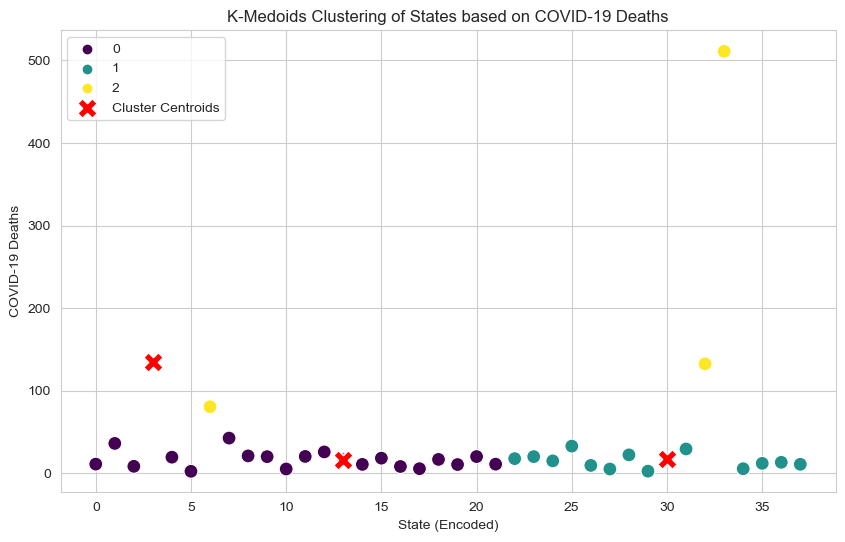

In [115]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming YouthData_no_outliers is your DataFrame containing the data

# Group the data by 'State' and calculate the sum of 'COVID-19 Deaths' for each state
state_death_counts = YouthData_no_outliers.groupby('State')['COVID-19 Deaths'].sum().reset_index()

print (state_death_counts)
# Encode the 'State' column
label_encoder = LabelEncoder()
state_death_counts['State_Encoded'] = label_encoder.fit_transform(state_death_counts['State'])

# Select features for clustering
X_state_deaths = state_death_counts[['State_Encoded', 'COVID-19 Deaths']]

# Perform k-medoids clustering
k_state_deaths = 3  # Choose the number of clusters
kmedoids_state_deaths = KMedoids(n_clusters=k_state_deaths, random_state=42)
kmedoids_state_deaths.fit(X_state_deaths)

# Add cluster labels to the data
state_death_counts['Cluster'] = kmedoids_state_deaths.labels_

# Calculate silhouette score
silhouette_avg_state_deaths = silhouette_score(X_state_deaths, kmedoids_state_deaths.labels_)
print("Silhouette Score:", silhouette_avg_state_deaths)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State_Encoded', y='COVID-19 Deaths', data=state_death_counts, hue='Cluster', palette='viridis', s=100)
sns.scatterplot(x=kmedoids_state_deaths.cluster_centers_[:, 0], y=kmedoids_state_deaths.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Cluster Centroids')
plt.title('K-Medoids Clustering of States based on COVID-19 Deaths')
plt.xlabel('State (Encoded)')
plt.ylabel('COVID-19 Deaths')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
 # Age Group  COVID-19 Deaths
#  0      0-24      1409.912124

Silhouette Score: 0.5079209124231494


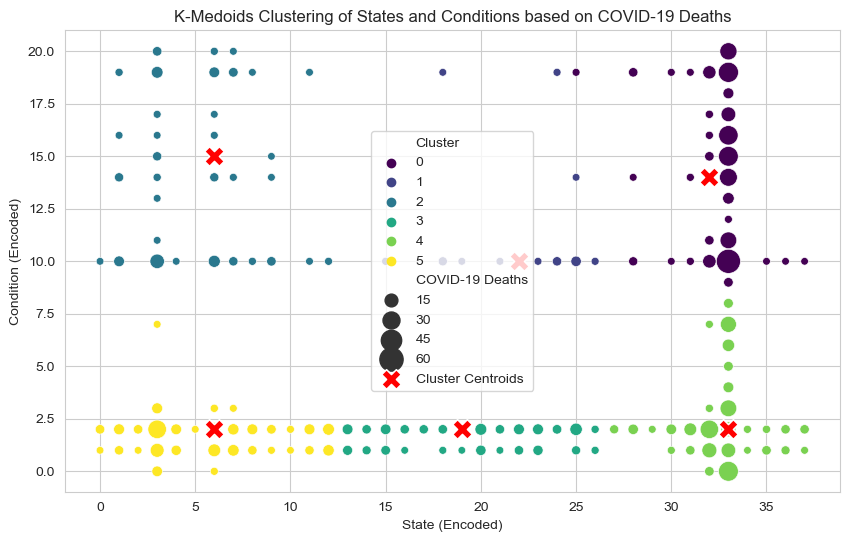

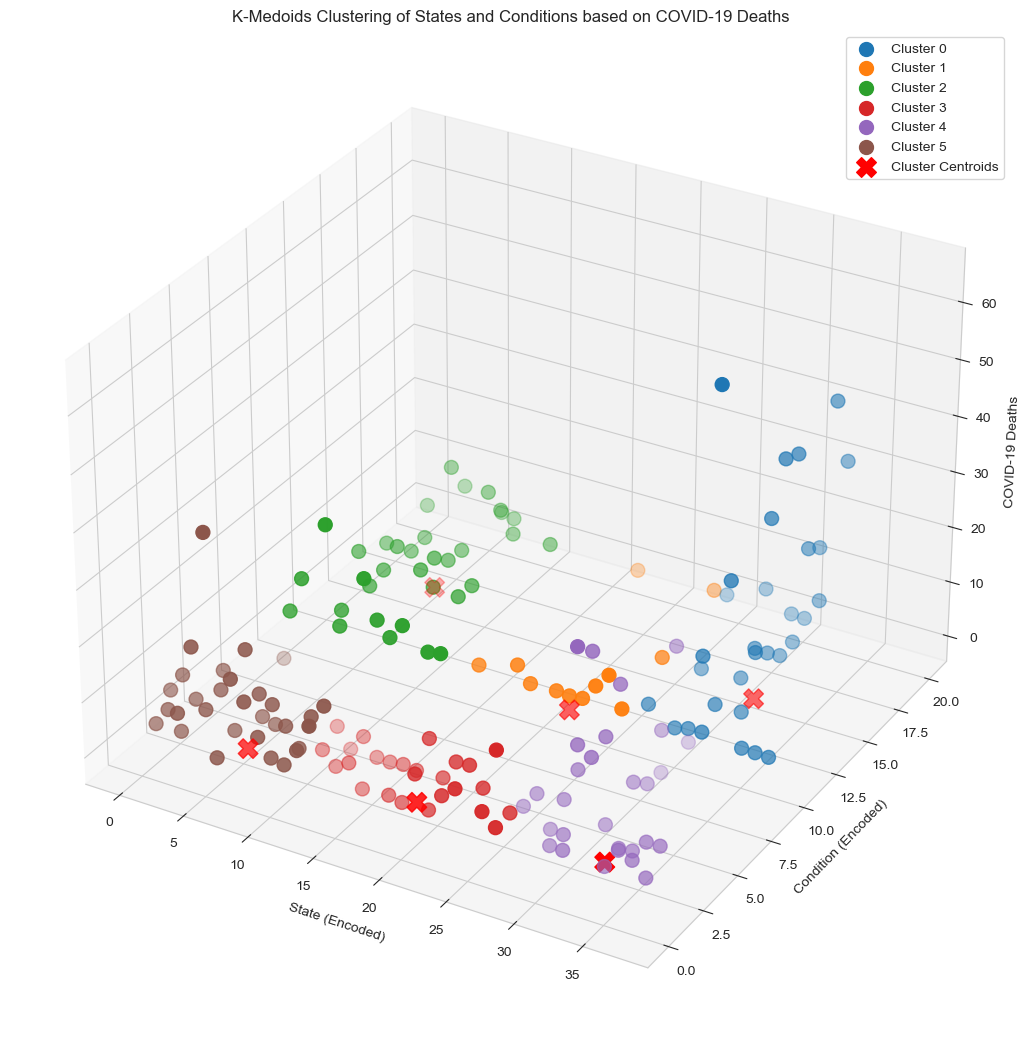

In [117]:
# Assuming YouthData_no_outliers is your DataFrame containing the data
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'State' and 'Condition' and calculate the sum of 'COVID-19 Deaths' for each combination
state_condition_death_counts = YouthData_no_outliers.groupby(['State', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

# Encode the 'State' and 'Condition' columns
label_encoder = LabelEncoder()
state_condition_death_counts['State_Encoded'] = label_encoder.fit_transform(state_condition_death_counts['State'])
state_condition_death_counts['Condition_Encoded'] = label_encoder.fit_transform(state_condition_death_counts['Condition'])

# Select features for clustering
X_state_condition_deaths = state_condition_death_counts[['State_Encoded', 'Condition_Encoded', 'COVID-19 Deaths']]

# Perform k-medoids clustering
k_state_condition_deaths = 6 # Choose the number of clusters
kmedoids_state_condition_deaths = KMedoids(n_clusters=k_state_condition_deaths, random_state=42)
kmedoids_state_condition_deaths.fit(X_state_condition_deaths[['State_Encoded', 'Condition_Encoded']])

# Add cluster labels to the data
state_condition_death_counts['Cluster'] = kmedoids_state_condition_deaths.labels_

# Calculate silhouette score
silhouette_avg_state_condition_deaths = silhouette_score(X_state_condition_deaths[['State_Encoded', 'Condition_Encoded']], kmedoids_state_condition_deaths.labels_)
print("Silhouette Score:", silhouette_avg_state_condition_deaths)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State_Encoded', y='Condition_Encoded', data=state_condition_death_counts, hue='Cluster', palette='viridis', size='COVID-19 Deaths', sizes=(30, 300))
sns.scatterplot(x=kmedoids_state_condition_deaths.cluster_centers_[:, 0], y=kmedoids_state_condition_deaths.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Cluster Centroids')
plt.title('K-Medoids Clustering of States and Conditions based on COVID-19 Deaths')
plt.xlabel('State (Encoded)')
plt.ylabel('Condition (Encoded)')
plt.legend()
plt.grid(True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(25, 13))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(k_state_condition_deaths):
    cluster_data = state_condition_death_counts[state_condition_death_counts['Cluster'] == cluster]
    ax.scatter(cluster_data['State_Encoded'], cluster_data['Condition_Encoded'], cluster_data['COVID-19 Deaths'], label=f'Cluster {cluster}', s=100)

# Plot centroids
ax.scatter(kmedoids_state_condition_deaths.cluster_centers_[:, 0], kmedoids_state_condition_deaths.cluster_centers_[:, 1], [0]*len(kmedoids_state_condition_deaths.cluster_centers_), color='red', marker='X', s=200, label='Cluster Centroids')

# Set labels and title
ax.set_xlabel('State (Encoded)')
ax.set_ylabel('Condition (Encoded)')
ax.set_zlabel('COVID-19 Deaths')
ax.set_title('K-Medoids Clustering of States and Conditions based on COVID-19 Deaths')

# Add legend
ax.legend()

# Show plot
plt.show()



In [118]:
# Print cluster centroids
print("Cluster Centroids:")
print(kmedoids_state_condition_deaths.cluster_centers_)

# Calculate and print the number of data points in each cluster
cluster_counts = state_condition_death_counts['Cluster'].value_counts().sort_index()
print("\nNumber of data points in each cluster:")
print(cluster_counts)

# Optionally, print details of each cluster
for cluster in range(k_state_condition_deaths):
    cluster_data = state_condition_death_counts[state_condition_death_counts['Cluster'] == cluster]
    print(f"\nCluster {cluster} Analysis:")
    print("Mean COVID-19 Deaths:", cluster_data['COVID-19 Deaths'].mean())
    print("Median COVID-19 Deaths:", cluster_data['COVID-19 Deaths'].median())
    print("Standard Deviation of COVID-19 Deaths:", cluster_data['COVID-19 Deaths'].std())
'''
Cluster 0: This cluster has a relatively high mean and median 'COVID-19 Deaths' compared to other clusters, 
with a considerable standard deviation. This suggests that Cluster 0 represents states and conditions 
with a wide range of COVID-19 death counts, with some states experiencing significantly higher numbers of deaths.
Cluster 1: This cluster has the lowest mean and median 'COVID-19 Deaths' among all clusters,
indicating that states and conditions in this cluster generally have lower COVID-19 death counts.
Additionally, the standard deviation is relatively low, indicating less variability in COVID-19 death counts within this cluster.
Cluster 2, 3, 4, and 5: These clusters have moderate mean and median 'COVID-19 Deaths' values,
with varying standard deviations. This suggests that these clusters represent states and conditions 
with moderate levels of COVID-19 death counts, with differing levels of variability.
'''
'''
             State  
0          Alabama        
1          Arizona        
2         Arkansas        
3       California       
4         Colorado        
5      Connecticut        
6          Florida        
7          Georgia        
8         Illinois        
9          Indiana        
10          Kansas        
11        Kentucky        
12       Louisiana        
13        Maryland        
14   Massachusetts        
15        Michigan        
16       Minnesota        
17     Mississippi        
18        Missouri        
19          Nevada        
20      New Jersey        
21      New Mexico        
22        New York        
23   New York City        
24  North Carolina        
25            Ohio        
26        Oklahoma        
27          Oregon        
28    Pennsylvania        
29     Puerto Rico        
30  South Carolina        
31       Tennessee        
32           Texas       
33   United States      
34            Utah        
35        Virginia        
36      Washington       
37       Wisconsin        
'''

Cluster Centroids:
[[32. 14.]
 [22. 10.]
 [ 6. 15.]
 [19.  2.]
 [33.  2.]
 [ 6.  2.]]

Number of data points in each cluster:
Cluster
0    31
1    12
2    34
3    26
4    29
5    31
Name: count, dtype: int64

Cluster 0 Analysis:
Mean COVID-19 Deaths: 14.021877869106092
Median COVID-19 Deaths: 6.068425588244111
Standard Deviation of COVID-19 Deaths: 16.1329828497479

Cluster 1 Analysis:
Mean COVID-19 Deaths: 3.7487677234977625
Median COVID-19 Deaths: 2.93886789088982
Standard Deviation of COVID-19 Deaths: 1.8509355911268426

Cluster 2 Analysis:
Mean COVID-19 Deaths: 4.97920031928178
Median COVID-19 Deaths: 3.1771850203986753
Standard Deviation of COVID-19 Deaths: 3.8592115331253956

Cluster 3 Analysis:
Mean COVID-19 Deaths: 6.459637285047325
Median COVID-19 Deaths: 5.88744482470819
Standard Deviation of COVID-19 Deaths: 2.898713605514473

Cluster 4 Analysis:
Mean COVID-19 Deaths: 11.450279980471178
Median COVID-19 Deaths: 6.2766434893416445
Standard Deviation of COVID-19 Deaths: 10.7912

'\n             State  \n0          Alabama        \n1          Arizona        \n2         Arkansas        \n3       California       \n4         Colorado        \n5      Connecticut        \n6          Florida        \n7          Georgia        \n8         Illinois        \n9          Indiana        \n10          Kansas        \n11        Kentucky        \n12       Louisiana        \n13        Maryland        \n14   Massachusetts        \n15        Michigan        \n16       Minnesota        \n17     Mississippi        \n18        Missouri        \n19          Nevada        \n20      New Jersey        \n21      New Mexico        \n22        New York        \n23   New York City        \n24  North Carolina        \n25            Ohio        \n26        Oklahoma        \n27          Oregon        \n28    Pennsylvania        \n29     Puerto Rico        \n30  South Carolina        \n31       Tennessee        \n32           Texas       \n33   United States      \n34            Utah        \

In [119]:
print(YouthData_no_outliers.info())
print(YouthData_no_outliers.describe())
print(YouthData_no_outliers["Condition"].unique())


<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 12463 to 537781
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Date          477 non-null    object 
 1   End Date            477 non-null    object 
 2   Year                477 non-null    float64
 3   Month               248 non-null    float64
 4   State               477 non-null    object 
 5   Condition Group     477 non-null    object 
 6   Condition           477 non-null    object 
 7   Age Group           477 non-null    object 
 8   COVID-19 Deaths     477 non-null    float64
 9   Number of Mentions  477 non-null    float64
 10  Age Group Integer   477 non-null    float64
dtypes: float64(5), object(6)
memory usage: 44.7+ KB
None
              Year       Month  COVID-19 Deaths  Number of Mentions  \
count   477.000000  248.000000       477.000000          477.000000   
mean   2021.148847    6.629032         2.955791         

Action to take for Youth in  Oklahoma is: ( Stay ) because of  1.9773779385325674


F:\anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



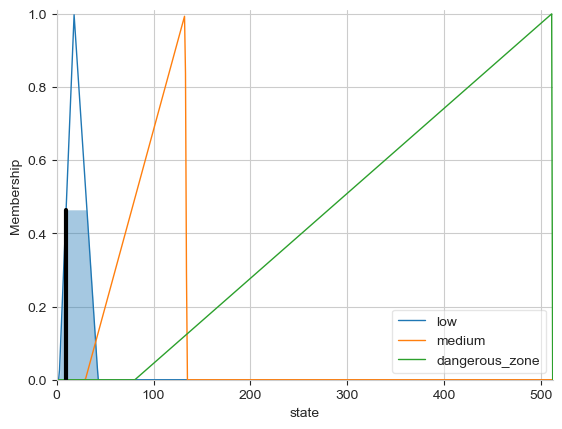

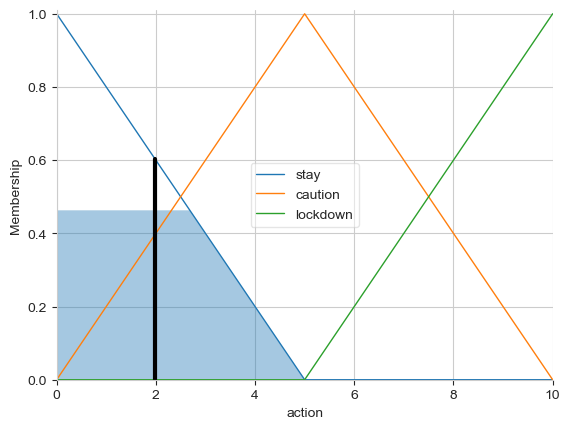

In [120]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
state_mapping = {
    'Alabama': 11.318952,
    'Arizona': 36.344523,
    'Arkansas': 8.617039,
    'California': 134.535059,
    'Colorado': 19.694498,
    'Connecticut': 2.564949,
    'Florida': 80.796458,
    'Georgia': 42.817573,
    'Illinois': 21.215141,
    'Indiana': 20.318572,
    'Kansas': 5.393628,
    'Kentucky': 20.581138,
    'Louisiana': 26.042479,
    'Maryland': 16.555292,
    'Massachusetts': 10.952910,
    'Michigan': 18.484911,
    'Minnesota': 8.408494,
    'Mississippi': 5.743003,
    'Missouri': 16.982491,
    'Nevada': 10.767052,
    'New Jersey': 20.416341,
    'New Mexico': 11.234692,
    'New York': 17.930809,
    'New York City': 20.348425,
    'North Carolina': 15.195505,
    'Ohio': 33.095114,
    'Oklahoma': 9.711116,
    'Oregon': 5.347108,
    'Pennsylvania': 22.479668,
    'Puerto Rico': 2.772589,
    'South Carolina': 17.311822,
    'Tennessee': 29.619287,
    'Texas': 132.701445,
    'United States': 511.111878,
    'Utah': 5.703782,
    'Virginia': 12.222536,
    'Washington': 13.478437,
    'Wisconsin': 11.097410,
}

# Create a list of all state names
state_names = list(state_mapping.keys())

# Create a list of all state values
state_values = sorted(state_mapping.values())

# Define universe and fuzzy sets
state_universe = np.arange(0, max(state_values) + 1, 1)

state = ctrl.Antecedent(state_universe, 'state')
state['low'] = fuzz.trimf(state.universe, [state_values[0], state_values[20], state_values[33]])
state['medium'] = fuzz.trimf(state.universe, [state_values[30], state_values[35], state_values[36]])
state['dangerous_zone'] = fuzz.trimf(state.universe, [state_values[34], state_values[37], state_values[-1]])


# Define output variable (for example, action to take)
action = ctrl.Consequent(np.arange(0, 11, 1), 'action')
action['stay'] = fuzz.trimf(action.universe, [0, 0, 5])
action['caution'] = fuzz.trimf(action.universe, [0, 5, 10])
action['lockdown'] = fuzz.trimf(action.universe, [5, 10, 10])

# Define rules
rule1 = ctrl.Rule(state['low'], action['stay'])
rule2 = ctrl.Rule(state['medium'], action['caution'])
rule3 = ctrl.Rule(state['dangerous_zone'], action['lockdown'])


# Create control system
action_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
action_simulation = ctrl.ControlSystemSimulation(action_ctrl)

# Define method for fuzzy assessment
def fuzzy_assessment(confirmed_cases):
    # Fuzzify the input (number of confirmed cases)
    action_simulation.input['state'] = confirmed_cases
    
    # Compute the result
    action_simulation.compute()
  

    state.view(action_simulation)
    action.view(action_simulation)
    # Return the result
    return action_simulation.output['action']
    

def get_action(output):
    if output <= 3:
        return "Stay"
    elif output <= 7:
        return "Caution"
    else:
        return "Lockdown"
# Example usage
state_name = 'Oklahoma'  # Example state
confirmed_cases = state_mapping[state_name]  # Number of confirmed cases for the example state
result = fuzzy_assessment(confirmed_cases)



action = get_action(result)
print("Action to take for Youth in ", state_name, "is:","(",action,")" , "because of " , result )
